In [16]:
import matplotlib.pyplot as plt
from ExtensiveFormGames import ExtensiveFormGameCalculator
from ExtensiveFormGames import Node


In [17]:
def get_rock_paper_scissors_as_extensive_form_game() -> ExtensiveFormGameCalculator:

    root = Node("Player1", "", 
    {
        "R": Node("Player2", "", {
            "R": Node("", "RR"),
            "P": Node("", "RP"),
            "S": Node("", "RS"),
        }, history="R"),
        "P": Node("Player2", "", {
            "R": Node("", "PR"),
            "P": Node("", "PP"),
            "S": Node("", "PS"),
        }, history="P"),
        "S": Node("Player2", "", {
            "R": Node("", "SR"),
            "P": Node("", "SP"),
            "S": Node("", "SS"),
        }, history="S")
        
    })
    matrix = {
        "RR": {"Player1": 0, "Player2": 0},
        "RP": {"Player1": -1, "Player2": 1},
        "RS": {"Player1": 1, "Player2": -1},
        "PR": {"Player1": 1, "Player2": -1},
        "PP": {"Player1": 0, "Player2": 0},
        "PS": {"Player1": -1, "Player2": 1},
        "SR": {"Player1": -1, "Player2": 1},
        "SP": {"Player1": 1, "Player2": -1},
        "SS": {"Player1": 0, "Player2": 0},
    }
    tree = ExtensiveFormGameCalculator(["Player1", "Player2"], [], root, matrix)
    return tree


In [18]:

def get_kuhn_poker_as_extensive_form_game() -> ExtensiveFormGameCalculator:
    root = Node("Chance", "", {
        "K": Node("Chance", "", {
                "K": Node("Player1", "K",{
                    "C": Node("Player2", "KC", {
                        "B": Node("Player1", "KCB",{
                            "C": Node("", "KKCBC"),
                            "F": Node("", "KKCBF")
                            }, "KKCB"),
                        "C": Node("", "KKCC")
                        }, "KKC"),
                    "B": Node("Player2", "KB", {
                        "C": Node("", "KKBC"),
                        "F": Node("", "KKBF")
                        }, "KKB")
                }, "KK"),
                "A": Node("Player1", "K",{
                    "C": Node("Player2", "AC", {
                        "B": Node("Player1", "KCB", {
                            "C": Node("", "KACBC"),
                            "F": Node("", "KACBF")
                            }, "KACB"),
                        "C": Node("", "KACC")
                        }, "KAC"),
                    "B": Node("Player2", "AB", {
                        "C": Node("", "KABC"),
                        "F": Node("", "KABF")
                    }, "KAB")
                }, "KA")
            }, "K"),
        
        "A": Node("Chance", "", {
                "K": Node("Player1", "A",{
                    "C": Node("Player2", "KC", {
                        "B": Node("Player1", "ACB", {
                            "C": Node("", "AKCBC"),
                            "F": Node("", "AKCBF")
                            }, "AKCB"),
                        "C": Node("", "AKCC")
                        }, "AKC"),
                    "B": Node("Player2", "KB", {
                        "C": Node("", "AKBC"),
                        "F": Node("", "AKBF")
                    }, "AKB")
                }, "AK"),
                "A": Node("Player1", "A",{
                    "C": Node("Player2", "AC", {
                        "B": Node("Player1", "ACB", {
                            "C": Node("", "AACBC"),
                            "F": Node("", "AACBF")
                            }, "AACB"),
                        "C": Node("", "AACC")
                        }, "AAC"),
                    "B": Node("Player2", "AB", {
                        "C": Node("", "AABC"),
                        "F": Node("", "AABF")
                    }, "AAB")
                }, "AA")
            }, "A")
    })
    
    matrix = {
        "KKCBC": {"Player1": 0, "Player2": 0},
        "KKCBF": {"Player1": -2, "Player2": 2},
        "KKCC": {"Player1": 0, "Player2": 0},
        "KKBC": {"Player1": 0, "Player2": 0},
        "KKBF": {"Player1": -2, "Player2": 2},
        
        "KACBC": {"Player1": -3, "Player2": 3},
        "KACBF": {"Player1": -2, "Player2": 2},
        "KACC": {"Player1": -2, "Player2": 2},
        "KABC": {"Player1": -3, "Player2": 3},
        "KABF": {"Player1": 2, "Player2": -2},
        
        "AKCBC": {"Player1": 3, "Player2": -3},
        "AKCBF": {"Player1": -2, "Player2": 2},
        "AKCC": {"Player1": 2, "Player2": -2},
        "AKBC": {"Player1": 3, "Player2": -3},
        "AKBF": {"Player1": 2, "Player2": -2},
        
        "AACBC": {"Player1": 0, "Player2": 0},
        "AACBF": {"Player1": -2, "Player2": 2},
        "AACC": {"Player1": 0, "Player2": 0},
        "AABC": {"Player1": 0, "Player2": 0},
        "AABF": {"Player1": 2, "Player2": -2}
    }
    tree = ExtensiveFormGameCalculator(["Player1", "Player2"], ["Chance"], root, matrix)
    return tree    

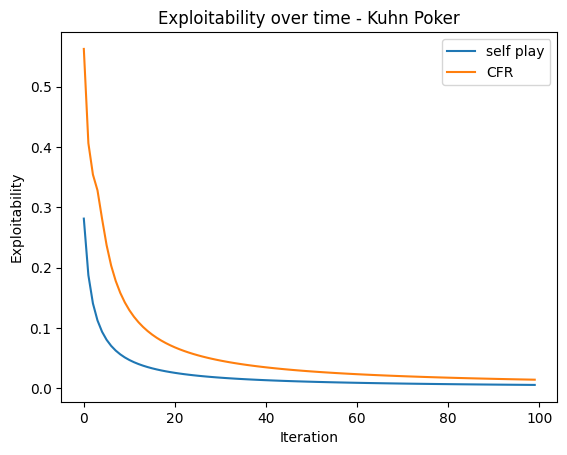

In [19]:
tree = get_kuhn_poker_as_extensive_form_game()

p1_strats, p2_strats, self_play_exploitability_over_time = tree.self_play(iterations=100)

CFR_Strategies, CFR_exploitability_over_time = tree.counterfactual_regret_minimization(iterations=100)


plt.plot(self_play_exploitability_over_time, label = "self play")
plt.plot(CFR_exploitability_over_time, label = "CFR")

plt.xlabel('Iteration')
plt.ylabel('Exploitability')
plt.title('Exploitability over time - Kuhn Poker')
plt.legend()
plt.show()

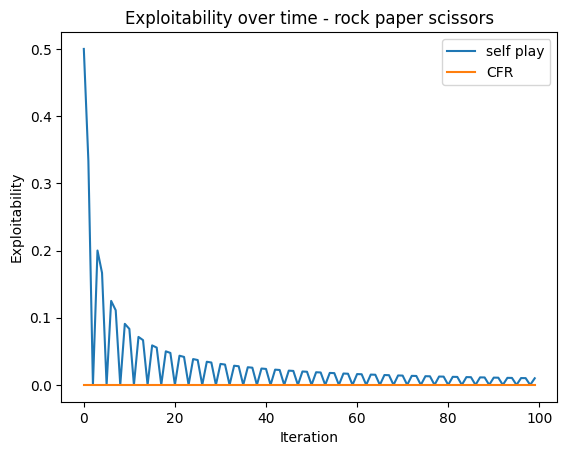

In [20]:
tree = get_rock_paper_scissors_as_extensive_form_game()

p1_strats, p2_strats, self_play_exploitability_over_time = tree.self_play(iterations=100)

CFR_Strategies, CFR_exploitability_over_time = tree.counterfactual_regret_minimization(iterations=100)


import matplotlib.pyplot as plt

plt.plot(self_play_exploitability_over_time, label = "self play")
plt.plot(CFR_exploitability_over_time, label = "CFR")

plt.xlabel('Iteration')
plt.ylabel('Exploitability')
plt.title('Exploitability over time - rock paper scissors')
plt.legend()
plt.show()

In [21]:
def get_averaging_example_game_tree():
    root = Node("Player1", "", {
        "A": Node("Player2", "A", {
            "1": Node("", "A1"),
            "2": Node("", "A2")
        }),
        "B": Node("Player2", "B", {
            "1": Node("", "B1"),
            "2": Node("Player1", "B2", {
                "A": Node("", "B2A"),
                "B": Node("", "B2B")
            })
        })
    })
    
    matrix = {
        "A1": {"Player1": -2, "Player2": 2},
        "A2": {"Player1": 1, "Player2": -1},
        "B1": {"Player1": 1, "Player2": -1},
        "B2A": {"Player1": 4, "Player2": -4},
        "B2B": {"Player1": 0, "Player2": 0},
    }
    tree = ExtensiveFormGameCalculator(["Player1", "Player2"], [], root, matrix)
    return tree

In [22]:
tree = get_averaging_example_game_tree()
list_strat = [
    {"Player1":
        {
            "": {"A": 0.2, "B": 0.8},
            "B2": {"A": 0.8, "B": 0.2}
        }
    },
    {"Player1":
        {
            "": {"A": 0.8, "B": 0.2},
            "B2": {"A": 0.2, "B": 0.8}
        }
    },
]

print("Strategy 1:")
print(list_strat[0])
print()
print("Strategy 2:")
print(list_strat[1])
print()
avg_strat = tree.average_strategy(list_strat)
print("Calculated avg strat:")
print(avg_strat)

Strategy 1:
{'Player1': {'': {'A': 0.2, 'B': 0.8}, 'B2': {'A': 0.8, 'B': 0.2}}}

Strategy 2:
{'Player1': {'': {'A': 0.8, 'B': 0.2}, 'B2': {'A': 0.2, 'B': 0.8}}}

Calculated avg strat:
{'Player1': {'': {'A': 0.5, 'B': 0.5}, 'B2': {'A': 0.68, 'B': 0.32}}}
